## 데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)

데이터셋 참고 자료
 https://tykimos.github.io/2017/03/25/Dataset_and_Fit_Talk/ <br>
케라스 이야기
https://tykimos.github.io/2017/01/27/Keras_Talk/

# 0. 사진 찍기



teachable machine 사이트에서 쉽게 데이터 만들수 있다.
https://teachablemachine.withgoogle.com/

여러 각도에서 찍어보세요.
여러 크기로 찍어보세요.
좋은 데이터를 활용하면 좋은 결과를 얻을수 있다.

# 1.디렉토리만들기

### 가위,바위,보 이미지 각각을 저장할 폴더 3개를 만들자

mkdir -p ~/aiffel/rock_scissor_paper/scissor <br>
mkdir -p ~/aiffel/rock_scissor_paper/rock    <br>
mkdir -p ~/aiffel/rock_scissor_paper/paper   <br>



-p 옵션을 주어 생성하게 되면 자동으로 중간 단계의 디렉토리를 생성하면서 그 하위 디렉토리를 생성하게된다.


# 2.이미지 크기 조절하기(28x28픽셀)
함수를 작성하고 안에 for문으로 가위,바위,보 데이터의 사이즈조절 코드를 작성하였다.

In [19]:

import os, glob
from PIL import Image  #PIL패키지에서 Image모듈가져옴  pillow =PIL : Python Imaging Library  

#가위바위보 리스트
list =('scissor','rock','paper')

# 이미지 28,28로 변경하는 함수
def change_img(str):
    target_size=(28,28) 
    for str_srp in list:
        image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper_2000/"+str_srp 
        print("이미지 디렉토리 경로: ", image_dir_path)
        images=glob.glob(image_dir_path + "/*.jpg")  
        #print(type(images))
        # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
        #target_size=(28,28)
        for img in images:
            old_img=Image.open(img)
            new_img=old_img.resize(target_size,Image.ANTIALIAS)
            new_img.save(img,"JPEG")
        print(str_srp + " 이미지 resize 완료!")

#함수 호출        
change_img(list)



이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_2000/scissor
scissor 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_2000/rock
rock 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper_2000/paper
paper 이미지 resize 완료!


### 가위,바위,보 각 3개의 디렉토리의 이미지 변경(28x28)을 한 함수로 정의하였다.

import os   -> os 모듈을 가져온다.
import glob -> glob는 파일들의 리스트를 뽑을 때 사용하는데, 파일의 경로명을 이용해서 접근할수 있다.
                참고 https://wikidocs.net/3746

from PIL import Image -> PIL패키지에서 Image모듈가져옴  
                      -> pillow = PIL : Python Imaging Library 



image_dir_path : 이미지(가위,바위,보)경로 변수

glob.glob("경로"+ "/*.jpg") : 경로에 존재하는 jpg확장자를 리스트로 반환

old_img = Image.open(이미지명.확장자) : 이미지 불러와서 old_img변수에 저장

old_img.resize(target_size,Image.ANTIALIAS) : 사이즈 재설정<br>
: resize(인자1,인자2) target_size만큼 이미지크기 조절<br>
: Image.ANTIALIAS 좀 더 좋은 품질의 이미지를 저장(?)
                        



# 3.트레이닝 데이터 만들기


In [21]:


import os, glob
from PIL import Image 
import numpy as np 

def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=9000   # 총 이미지 개수
    img_size=28   #이미지 픽셀크기(28x28)
    color=3   # RGB 3개
    
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    #imgs 6000*28*28*3 형태의 차원행렬? , 값들은 0으로 저장되어 있다.
    
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper_3000"
(x_train, y_train)=load_data(image_dir_path)
# x_train = imgs  ,labels = y_train
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화



print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 8799 입니다.
x_train shape: (9000, 28, 28, 3)
y_train shape: (9000,)


numpy는 과학 계산을 위한 라이브러리로서 다차원 배열을 처리하는데 필요한 여러 유용한 기능을 제공하고 있다. <br>
공학 프로그램의 대표주자인 매틀랩(MATLAB)과 상당히 유사한 파이썬+numpy를 활용하면 행렬 계산을 하는데 유용하게 사용할 수 있다.<br>
numpy를 np로 줄여서 표현한다.


#### import numpy as np  : numpy의 패키지를 코드에서 호출할때 np로 부른다 

#### np.zeros(shape, dtype, order)  참조 https://firework-ham.tistory.com/33
np.zeros( 6000 * 28 * 28 * 3, dtype=np.int8) : 28x28x3개 원소를 갖는 zero vector 생성<br>
.reshape(6000,28,28,3) : zero vector를 6000x28x28x3 형식으로 재설정한다.<br>
(데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수) 채널수1=흑백 채널수=3(RGB)


glob.glob : 경로에 존재하는 파일들을 리스트로 반환<br>
glob.iglob : 경로에 존재하는 파일들을 이터레이터로 반환<br>
glob 참조 https://docs.python.org/ko/3/library/glob.html

numpy의 자료형 https://eunguru.tistory.com/216


print(type(x_train)) 출력 <class 'numpy.ndarray'> <br>
print(type(y_train)) 출력 <class 'numpy.ndarray'> <br>

x_train_norm = x_train/255.0  <br>
인공지능 모델을 훈련 및 사용할때, 일반적으로 입력은 0에서 1 사이의 값으로 정규화 시키는것이 좋다. 이미지나 MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0으로 나누워주자.최소값이 0, 최대값이 1이다


# 4. Matplotlib를 활용하여 데어터값 확인하기

라벨:  0


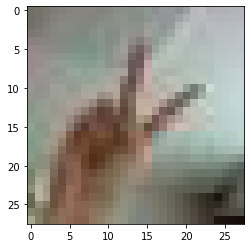

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[900])  # x_train[900]의 이미지표현
print('라벨: ', y_train[900])


Matplotlib은 파이썬에서 매트랩과 유사한 그래프 표시를 가능케 하는 라이브러리다. 데이터를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지로서 가장 많이 사용되는 데이타 시각화(Data Visualization) 패키지

참고 http://pythonstudy.xyz/python/article/407-Matplotlib-%EC%B0%A8%ED%8A%B8-%ED%94%8C%EB%A1%AF-%EA%B7%B8%EB%A6%AC%EA%B8%B0

pyplot은 Matplotlib에서 지원하는 모듈
pyplo의 인터페이스는 겉으로는 드러나지 않으면서 자동으로 figure와 axes를 생성한다는데 뭔지 모르겠다 /참고 https://wikidocs.net/4763

plt.imshow() 참조 https://steemit.com/kr-dev/@dj-on-steem/matplotlib-08-plot-main-imshow


print('라벨: ', y_train[900])  : 라벨 0이면 가위, 1이면 바위, 2이면 보

# 5. 딥러닝 네트워크 설계하기

In [195]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1=64
n_channel_2=64
n_dense=32 # 8로 지정했을때 정확도가 올라가지 않음
n_train_epoch=35

model_rock_scissor_paper=keras.models.Sequential()
model_rock_scissor_paper.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model_rock_scissor_paper.add(keras.layers.MaxPool2D(2,2))
model_rock_scissor_paper.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model_rock_scissor_paper.add(keras.layers.MaxPooling2D((2,2)))
model_rock_scissor_paper.add(keras.layers.Flatten())
model_rock_scissor_paper.add(keras.layers.Dense(n_dense, activation='relu')) # 분류기 알고리즘을 얼마나 복잡하게 할것인가?
model_rock_scissor_paper.add(keras.layers.Dense(3, activation='softmax')) # class수가 3개이므로 3개


model_rock_scissor_paper.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                51232     
_________________________________________________________________
dense_39 (Dense)             (None, 3)               

# 6. 학습시키기(트레이닝세트를 활용하여)

In [196]:
model_rock_scissor_paper.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#optimizer='adam' 최적화는 adam방식, 손실함수는 sparse_categorical_crossentropy 사용


#모델 훈련
model_rock_scissor_paper.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/35
9000/9000 [==============================] - 2s 257us/sample - loss: 1.7771 - acc: 0.5766
Epoch 2/35
9000/9000 [==============================] - 2s 248us/sample - loss: 0.5243 - acc: 0.7702
Epoch 3/35
9000/9000 [==============================] - 2s 247us/sample - loss: 0.3786 - acc: 0.8512
Epoch 4/35
9000/9000 [==============================] - 2s 245us/sample - loss: 0.2915 - acc: 0.8861
Epoch 5/35
9000/9000 [==============================] - 2s 245us/sample - loss: 0.2228 - acc: 0.9171
Epoch 6/35
9000/9000 [==============================] - 2s 248us/sample - loss: 0.2057 - acc: 0.9206
Epoch 7/35
9000/9000 [==============================] - 2s 245us/sample - loss: 0.1530 - acc: 0.9411
Epoch 8/35
9000/9000 [==============================] - 2s 246us/sample - loss: 0.1294 - acc: 0.9526
Epoch 9/35
9000/9000 [==============================] - 2s 247us/sample - loss: 0.1259 - acc: 0.9553
Epoch 10/35
9000/9000 [==============================] - 2s 250us/sample - loss: 0.1244 - a

model.compile()모델 학습과정 설정하기 <br>
model.fit()    모델 학습시키기

optimizer='adam' 최적화는 adam방식, 손실함수는 sparse_categorical_crossentropy 사용


<br>
sparse_categorical_crossentropy 다중 분류 손실 함수 https://hororolol.tistory.com/375


compile()시 파라미터로 준 metrics라는 것은 훈련할 때 보여주는 공간 뜻한다.즉, 훈련을 모니터링하기 위한 지표를 선택하는 것이고 이를 'accuracy'로 지정함
1.222 -> 1 이와 같이 1.XXX값은 1로 분류해버리는 분류모델 같은 경우에 사용하는 지표가 'accuracy'이다. <br>
소수점을 사용하는 회귀 모델 같은 경우는 accuracy를 사용할 수 없습니다.
참조https://ebbnflow.tistory.com/122




<br><br><br>

x_train 트레이닝 이미지들<br>
y_train 트레이닝 라벨 0~2의 값들<br>
n_train_epoch  에포크 - 훈련셋을 몇 번 반복해서 학습할 것인가를 정하는 것<br>



## 7.테스팅 데이터 만들기

<br>트레이닝 데이터 만드는방법과 동일하다 데이터의 양과 데이터 가 틀림

In [205]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
import numpy as np #추가


def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300  
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper_test"
(x_test, y_test)=load_test_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화



print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


# 8.테스트 하기

In [206]:


# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# [[YOUR CODE]]


# 모델 시험
test_loss, test_accuracy = model_rock_scissor_paper.evaluate(x_test, y_test, verbose=3)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

test_loss: 1.8873891500096458 
test_accuracy: 0.8233333230018616


```
데이터를 아래와 같이 준비하고 학습을 해보왔다.  
트레이닝 데이터 :300장, 3000장 6000장 9000장  
테스트 데이터 :3개의 300장 (팀원 3명에 대한 이미지)  

트레이닝 데이터가 300장 인 경우 정확도 30% 미만, 3000장인 경우 40%~60%, 6000장은 50~65% 의 결과가 나왔다. 그런데 9000장을 돌리면 더 높은 정확도나 나올줄 알았는데 6000장보다 낮거나 비슷한정도로 나왔다. 그래서 에포크의 수치를 높여보니 높은수치 wj가 나왔다.(오버피팅때문에 에포크를 너무 낮춰도 안되는것같다.) 즉 이미지양이 많을수록 그만큼 에포크 수치를 높아야 훈련학습을 잘하는것 같다.
또한 트레이닝 이미지를 수집할때 선별적으로 데이터를 수집해야되는것 같다. 아이펠 교육생분들의 여러 가위,바위,보 이미지가 있었지만 그중에서 뒷 배경때문에 이것이 손인지 구분이 안되는 경우가 있었고, 너무 뒤에서 찍어서 가위인지 바위인지 알수 없었던 이미지들도 있었다. 그래서 이러한 애매호모한 이미지들을 제거하고 훈련을 해보니 조금더 높은 정확도수치를 얻을수 있었다. 이런방법은 말 그대로 정확도를 올리기 위한 방법이기에 적절하지 않은 방법이라고 생각되지만 이런 저런 방법을 적용하면서 머신러닝에 조금더 이해하게 된것 같다.
```